In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Cleaning Pre Merge

In [36]:
import pandas as pd

# Read the Fake CSV file
fake_df = pd.read_csv("Fake.csv")

# Read the True CSV file
real_df = pd.read_csv("True.csv")

# Add a new column called Class with a value of Fake = 1 , True = 0
fake_df['class'] = 1
real_df['class'] = 0

print(fake_df.isna().sum())
print(real_df.isna().sum())
print(fake_df.head())
print(real_df.head())

title      0
text       0
subject    0
date       0
class      0
dtype: int64
title      0
text       0
subject    0
date       0
class      0
dtype: int64
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  class  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3 

In [64]:
# First we clean the data , and remove the country and Reuters from the text
# As all real text, contains the country/state and reuters it would not be fair when we run the classficiation

#real_df['text'] = real_df['text'].str.replace(r'^[A-Za-z ]+\(Reuters\) + - ', '')


In [65]:
real_df

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",- The head of a conservative Republican factio...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,- Transgender people will be allowed for the f...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,- The special counsel investigation of links b...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,- Trump campaign adviser George Papadopoulos t...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,- NATO allies on Tuesday welcomed President Do...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"- LexisNexis, a provider of legal, regulatory ...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,- In the shadow of disused Soviet-era factorie...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,- Vatican Secretary of State Cardinal Pietro P...,worldnews,"August 22, 2017",0


In [37]:
# Drop Duplicates when both column exist in other rows

fake_df_dupesdropped = fake_df.drop_duplicates(subset=['title','text'],keep="first")

len(fake_df_dupesdropped)

17908

In [38]:
real_df_dupesdropped = real_df.drop_duplicates(subset=['title','text'],keep="first")

len(real_df_dupesdropped)

21197

### Data Merger

In [39]:
# Merge the two csv [True and Fake]
merged_df = pd.concat([fake_df_dupesdropped, real_df_dupesdropped], ignore_index=True)

# Save the merged dataframe to a new CSV file
#merged_df.to_csv("merged_news.csv", index=False)


# Have to clean the Fake Dataset, a few of the rows are broken. 10 Rows in the Fake dataset is broken for the Title and Text
# The dates in Fake Dataset also need to be clean, some are shorten form date , some are full formatted 

## Data Cleaning Post Merge

In [42]:
merged_df.head(-5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
39095,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
39096,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",0
39097,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
39098,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",0


In [13]:
# Convert Date column into Dates, this is because some of the data in the date column have shorten form

merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')  
# If they are improper dates, it will be NAT (Not a time)

In [14]:
na_date_rows = merged_df[merged_df['date'].isna()]

print(na_date_rows['date']) # Rows that do not have a published date.

9358    NaT
15507   NaT
15508   NaT
15839   NaT
15840   NaT
17432   NaT
17433   NaT
18933   NaT
21869   NaT
21870   NaT
Name: date, dtype: datetime64[ns]


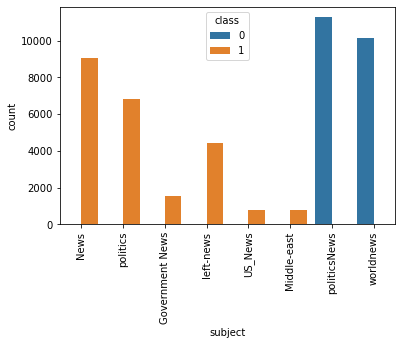

In [15]:

# We might have to clean the Subject column

sns.countplot(x='subject',hue='class',data=merged_df) 
plt.xticks(rotation=90) 

plt.show() 
# From the chart, we can realize that each csv had their own way of categorizing the subject, 
# hence it might not be accurate in to re-label them, hence we would be dropping the subject
# We would also be doing topic modelling, hence we will be using our own topics.

In [17]:
# Things to drop before creaeting a new csv

data = merged_df.dropna()
data.drop(columns=['subject'])

,title,text,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,2017-12-25,1
...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,2017-08-22,0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",2017-08-22,0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,2017-08-22,0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,2017-08-22,0


### Data Transformaton / Processing

In [18]:
# Create separate columns for date, month, year, and day of the week
data['date_ofmonth'] = data['date'].dt.strftime('%d')
data['month'] = data['date'].dt.strftime('%m')
data['year'] = data['date'].dt.strftime('%Y')
data['day_of_week'] = data['date'].dt.strftime('%A')
data['year_month'] = data['date'].dt.to_period('M')

#### NLTK Processing , Count words etc

In [23]:
#remove stopwords in the text for NER EDA
stop = stopwords.words('english')
data['text_without_stopwords'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['title_without_stopwords'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Write the newly cleaned dataframe in new file
data.to_csv("merged_cleaned.csv", index=False) # Final Dataset